## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

```mm23ap```

Your full name: 

```Asish Panda```

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
import cv2
import math

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# always check your version
print(torch.__version__)

2.2.1


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [27]:
# TO COMPLETE
import os
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch.optim as optim
from torch.nn import functional as F

torch.manual_seed(0)

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    if torch.backends.mps.is_available():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")

print(device)

mps


In [28]:
class TinyImage30Dataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.classes = [f for f in os.listdir(directory) if not f.startswith('.') and not f.endswith('.txt')]
        self.classes.sort()
        self.class_to_idx = {self.classes[i]: i for i in range(len(self.classes))}
        self.samples = []

        for class_name in self.classes:
            class_dir = os.path.join(directory, class_name)
            for img_name in os.listdir(class_dir):
                if img_name.endswith('.JPEG') or img_name.endswith('.png'):
                    self.samples.append((os.path.join(class_dir, img_name), self.class_to_idx[class_name]))
                

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image, target

In [29]:
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dir = 'data/train_set'  
test_dir = 'data/test_set'      

In [30]:
full_dataset = TinyImage30Dataset(directory=train_dir, transform=transform)

In [31]:
full_dataset_size = len(full_dataset)
test_size = int(0.2 * full_dataset_size)  # 20% for testing
train_size = full_dataset_size - test_size

# Split the dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, test_size])

# Creating DataLoader instances for the train and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [32]:

for i, (images,labels) in enumerate(val_loader):
    print(f"Batch {i} in val_loader: images shape {images.shape}, labels shape {labels.shape}")
    if i == 1:  # Just to check the first couple of batches
        break

Batch 0 in val_loader: images shape torch.Size([32, 3, 64, 64]), labels shape torch.Size([32])
Batch 1 in val_loader: images shape torch.Size([32, 3, 64, 64]), labels shape torch.Size([32])


In [33]:
for i, (images, labels) in enumerate(train_loader):
    print(f"Batch {i} in train_loader: images shape {images.shape}, labels shape {labels.shape}")
    if i == 1:  # Just to check the first couple of batches
        break

Batch 0 in train_loader: images shape torch.Size([32, 3, 64, 64]), labels shape torch.Size([32])
Batch 1 in train_loader: images shape torch.Size([32, 3, 64, 64]), labels shape torch.Size([32])


### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [34]:
# TO COMPLETE
# define a MLP Model class


class MLP(nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units) 
        self.activation1 = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_units, 256)
        self.fc3 = nn.Linear(256, output_units)

    def forward(self, x):
        x = x.view(-1, 3 * 64 * 64) 
        x = self.activation1(self.fc1(x))
        x = self.activation1(self.fc2(x))
        x = self.fc3(x)
        return x


In [43]:
input_units = 3 * 64 * 64
hidden_units = 512
output_units = 30

# Instantiate the model
mlp_model = MLP(input_units=input_units, hidden_units=hidden_units, output_units=output_units)

### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [36]:
# TO COMPLETE
# define a CNN Model class

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Use 3 for RGB images
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128) 
        self.fc2 = nn.Linear(128, 30)

    def forward(self, x):
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)  # Flatten the output
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn_model = SimpleCNN()

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [11]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [37]:
#TO COMPLETE --> Running your MLP model class
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
    # Set the device to GPU if available
    
    model = model.to(device)

    # Track loss and accuracy values for plotting
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        running_corrects = 0

        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # Backward + optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)


        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.float() / len(train_loader.dataset)

        # Validation phase
        model.eval()  # Set model to evaluate mode
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Statistics
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_loss / len(val_loader.dataset)
        val_epoch_acc = val_corrects.float() / len(val_loader.dataset)

        print(f'Epoch {epoch}/{num_epochs - 1} - '
              f'Train Loss: {epoch_loss:.4f} - Train Acc: {epoch_acc:.4f} - '
              f'Val Loss: {val_epoch_loss:.4f} - Val Acc: {val_epoch_acc:.4f}')

        # Record the loss and accuracy
        history['train_loss'].append(epoch_loss)
        history['val_loss'].append(val_epoch_loss)
        history['train_acc'].append(epoch_acc.item())
        history['val_acc'].append(val_epoch_acc.item())

    return model, history


In [39]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    plt.show()

Epoch 0/19 - Train Loss: 2.6939 - Train Acc: 0.2243 - Val Loss: 2.8339 - Val Acc: 0.1915
Epoch 1/19 - Train Loss: 2.6307 - Train Acc: 0.2367 - Val Loss: 2.8290 - Val Acc: 0.2044
Epoch 2/19 - Train Loss: 2.5779 - Train Acc: 0.2494 - Val Loss: 2.8140 - Val Acc: 0.2033
Epoch 3/19 - Train Loss: 2.5259 - Train Acc: 0.2661 - Val Loss: 2.8211 - Val Acc: 0.2078
Epoch 4/19 - Train Loss: 2.4765 - Train Acc: 0.2756 - Val Loss: 2.7952 - Val Acc: 0.2070
Epoch 5/19 - Train Loss: 2.4260 - Train Acc: 0.2898 - Val Loss: 2.8103 - Val Acc: 0.2133
Epoch 6/19 - Train Loss: 2.3818 - Train Acc: 0.2978 - Val Loss: 2.8415 - Val Acc: 0.2115
Epoch 7/19 - Train Loss: 2.3444 - Train Acc: 0.3153 - Val Loss: 2.8225 - Val Acc: 0.2041
Epoch 8/19 - Train Loss: 2.3065 - Train Acc: 0.3248 - Val Loss: 2.8352 - Val Acc: 0.2144
Epoch 9/19 - Train Loss: 2.2602 - Train Acc: 0.3394 - Val Loss: 2.8225 - Val Acc: 0.2215
Epoch 10/19 - Train Loss: 2.2183 - Train Acc: 0.3480 - Val Loss: 2.8731 - Val Acc: 0.2100
Epoch 11/19 - Train 

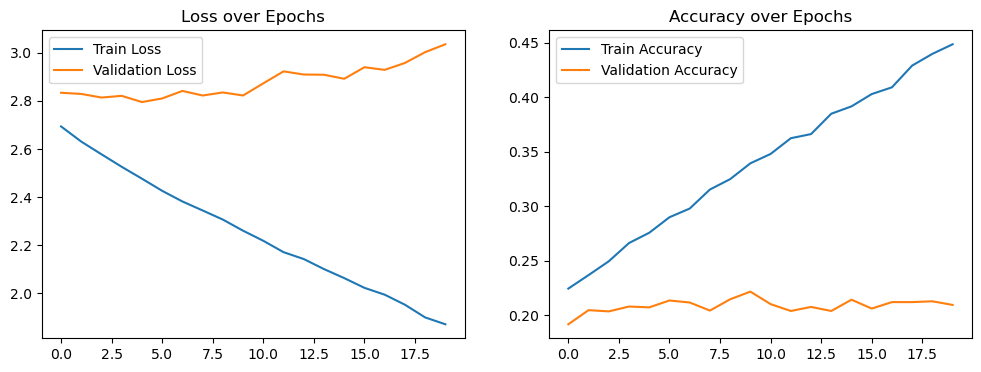

In [45]:
# Your graph
mlp_criterion = nn.CrossEntropyLoss()
mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=1e-3)

# Train MLP model
mlp_model, mlp_history = train_model(mlp_model, train_loader, val_loader, mlp_criterion, mlp_optimizer, num_epochs=20)

# Plot training history for MLP
plot_training_history(mlp_history)

We can see from the above graphs that the model starts to overfit around epoch 15, where the validation loss starts deteriorating.

Epoch 0/14 - Train Loss: 2.8549 - Train Acc: 0.1851 - Val Loss: 2.5393 - Val Acc: 0.2670
Epoch 1/14 - Train Loss: 2.1982 - Train Acc: 0.3631 - Val Loss: 2.2049 - Val Acc: 0.3619
Epoch 2/14 - Train Loss: 1.7914 - Train Acc: 0.4811 - Val Loss: 2.2211 - Val Acc: 0.3770
Epoch 3/14 - Train Loss: 1.3977 - Train Acc: 0.5821 - Val Loss: 2.3648 - Val Acc: 0.3767
Epoch 4/14 - Train Loss: 1.0044 - Train Acc: 0.7005 - Val Loss: 2.5583 - Val Acc: 0.3878
Epoch 5/14 - Train Loss: 0.6160 - Train Acc: 0.8136 - Val Loss: 3.0013 - Val Acc: 0.3800
Epoch 6/14 - Train Loss: 0.3203 - Train Acc: 0.9092 - Val Loss: 3.6370 - Val Acc: 0.3481
Epoch 7/14 - Train Loss: 0.1845 - Train Acc: 0.9495 - Val Loss: 4.0592 - Val Acc: 0.3633
Epoch 8/14 - Train Loss: 0.1013 - Train Acc: 0.9731 - Val Loss: 4.4402 - Val Acc: 0.3559
Epoch 9/14 - Train Loss: 0.0796 - Train Acc: 0.9784 - Val Loss: 4.9322 - Val Acc: 0.3481
Epoch 10/14 - Train Loss: 0.0981 - Train Acc: 0.9731 - Val Loss: 5.3002 - Val Acc: 0.3404
Epoch 11/14 - Train 

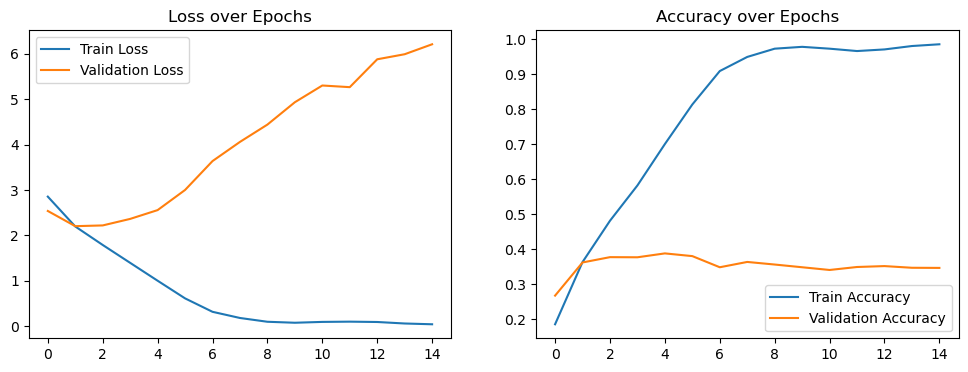

In [47]:
#TO COMPLETE --> Running your CNN model class
# Do the same for the CNN model with its own criterion and optimizer
cnn_model = SimpleCNN()
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

# Train CNN model
cnn_model, cnn_history = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=15)

# Plot training history for CNN
plot_training_history(cnn_history)

We can see the accuracy flatlines at around 7 epochs and the validation accuracy starts decreasing after epoch 8, thus we will create another CNN model to see if our overall validation accuracy can increase from the current one. 

In [48]:
class SimpleCNN_Improved(nn.Module):
    def __init__(self, num_classes=30):
        super(SimpleCNN_Improved, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=128 * 8 * 8, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)  # Flatten the layer before feeding it into fully connected layers
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x
    


Epoch 0/14 - Train Loss: 2.7937 - Train Acc: 0.1975 - Val Loss: 2.3241 - Val Acc: 0.3070
Epoch 1/14 - Train Loss: 2.1819 - Train Acc: 0.3719 - Val Loss: 2.1370 - Val Acc: 0.3952
Epoch 2/14 - Train Loss: 1.7740 - Train Acc: 0.4769 - Val Loss: 2.0051 - Val Acc: 0.4389
Epoch 3/14 - Train Loss: 1.3587 - Train Acc: 0.5910 - Val Loss: 2.0714 - Val Acc: 0.4456
Epoch 4/14 - Train Loss: 0.8894 - Train Acc: 0.7256 - Val Loss: 2.4527 - Val Acc: 0.4300
Epoch 5/14 - Train Loss: 0.4503 - Train Acc: 0.8567 - Val Loss: 2.8047 - Val Acc: 0.4322
Epoch 6/14 - Train Loss: 0.2298 - Train Acc: 0.9315 - Val Loss: 3.4132 - Val Acc: 0.4241
Epoch 7/14 - Train Loss: 0.1582 - Train Acc: 0.9534 - Val Loss: 3.8183 - Val Acc: 0.4048
Epoch 8/14 - Train Loss: 0.1112 - Train Acc: 0.9647 - Val Loss: 4.4554 - Val Acc: 0.4126
Epoch 9/14 - Train Loss: 0.1018 - Train Acc: 0.9687 - Val Loss: 4.3927 - Val Acc: 0.4067
Epoch 10/14 - Train Loss: 0.1135 - Train Acc: 0.9643 - Val Loss: 4.7010 - Val Acc: 0.4004
Epoch 11/14 - Train 

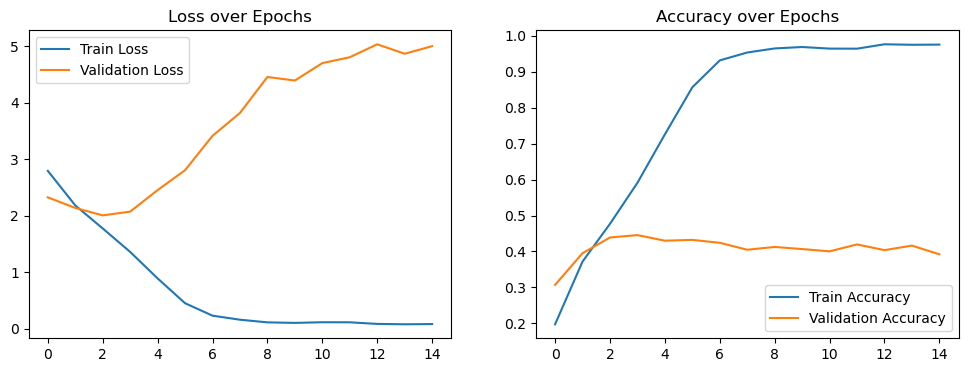

In [49]:
model = SimpleCNN_Improved()
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train CNN model
model, cnn_history = train_model(model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=15)

# Plot training history for CNN
plot_training_history(cnn_history)

We can observe that at around epoch 9 our training accuracy stops improving while our validation accuracy starts decreasing, thus we will only train our model till epoch 8 for the optimum performance

In [50]:
model = SimpleCNN_Improved()
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train CNN model
model, _ = train_model(model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=8)

Epoch 0/7 - Train Loss: 2.7822 - Train Acc: 0.2060 - Val Loss: 2.4333 - Val Acc: 0.2956
Epoch 1/7 - Train Loss: 2.2124 - Train Acc: 0.3576 - Val Loss: 2.2194 - Val Acc: 0.3670
Epoch 2/7 - Train Loss: 1.8412 - Train Acc: 0.4616 - Val Loss: 2.1156 - Val Acc: 0.4130
Epoch 3/7 - Train Loss: 1.4542 - Train Acc: 0.5688 - Val Loss: 2.0799 - Val Acc: 0.4293
Epoch 4/7 - Train Loss: 0.9894 - Train Acc: 0.6999 - Val Loss: 2.2935 - Val Acc: 0.4270
Epoch 5/7 - Train Loss: 0.5306 - Train Acc: 0.8375 - Val Loss: 2.7998 - Val Acc: 0.4326
Epoch 6/7 - Train Loss: 0.2612 - Train Acc: 0.9191 - Val Loss: 3.3461 - Val Acc: 0.4204
Epoch 7/7 - Train Loss: 0.1456 - Train Acc: 0.9555 - Val Loss: 3.8282 - Val Acc: 0.4111


> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

##### MLP Model
- The MLP (Multilayer Perceptron) model consists of three fully connected layers with Sigmoid activations for the first two layers and a CrossEntropyLoss criterion to handle multi-class classification.
- The model takes an input flattened from a 64x64 RGB image, resulting in a 12,288-dimensional input vector. This vector is then connected to a hidden layer with 512 units, followed by another hidden layer with 256 units, and finally to an output layer with 30 units corresponding to the number of classes.
- The performance of the MLP model on the training set improves over epochs. However, like the CNN model, the validation accuracy remains low and does not improve, while the validation loss increases, indicating overfitting.

##### CNN Model
- The CNN model consists of three convolutional layers with max pooling and ReLU activations, followed by two fully connected layers.
- Convolutional layers are designed to automatically and adaptively learn spatial hierarchies of features from input images, which is beneficial for image classification tasks.
- The CNN model exhibits similar overfitting trends as the MLP model, with high training accuracy but low validation accuracy that does not improve.

##### Number of Parameters:
1. For the MLP:
- First fully connected layer: (3∗64∗64)∗512+512(3∗64∗64)∗512+512 (weights + biases)
- Second fully connected layer: 512∗256+256512∗256+256
- Third fully connected layer: 256∗30+30256∗30+30
2. For the CNN:
- First convolutional layer: (3∗3∗3)∗32+32(3∗3∗3)∗32+32 (weights + biases)
- Second convolutional layer: (32∗3∗3)∗64+64(32∗3∗3)∗64+64
- Third convolutional layer: (64∗3∗3)∗128+128(64∗3∗3)∗128+128
- First fully connected layer: (128∗8∗8)∗512+512(128∗8∗8)∗512+512
- Second fully connected layer: 512∗30+30512∗30+30

##### Why Use CNN Over MLP for Image Classification:
- Parameter Efficiency: CNNs require significantly fewer parameters than MLPs because they take advantage of the 2D structure of input data, unlike MLPs, which require a separate parameter for each input feature.
- Feature Learning: CNNs can learn to recognize spatial hierarchies in images, capturing the presence of complex structures like edges and patterns within local receptive fields, which is essential for image recognition.
- Translation Invariance: The pooling layers in CNNs make the detection of features somewhat invariant to the location in the image.
- Generalization: CNNs are generally better at generalizing from training data to unseen data (when properly regularized), which is crucial for classification tasks with varied and complex datasets.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [30]:
# Your code here!
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to get predictions and true labels
def get_all_preds_labels(loader, model):
    all_preds = []
    all_labels = []
    model = model.to(device).eval()
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.float().to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds.cpu().numpy())  
            all_labels.append(labels.cpu().numpy())  

    # Concatenate all batches
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    return all_preds, all_labels

train_preds, train_labels = get_all_preds_labels(train_loader, model)
val_preds, val_labels = get_all_preds_labels(val_loader, model)

In [31]:
print(f"Train predictions shape: {train_preds.shape}, Train labels shape: {train_labels.shape}")
print(f"Validation predictions shape: {val_preds.shape}, Validation labels shape: {val_labels.shape}")

Train predictions shape: (10800,), Train labels shape: (10800,)
Validation predictions shape: (2700,), Validation labels shape: (2700,)


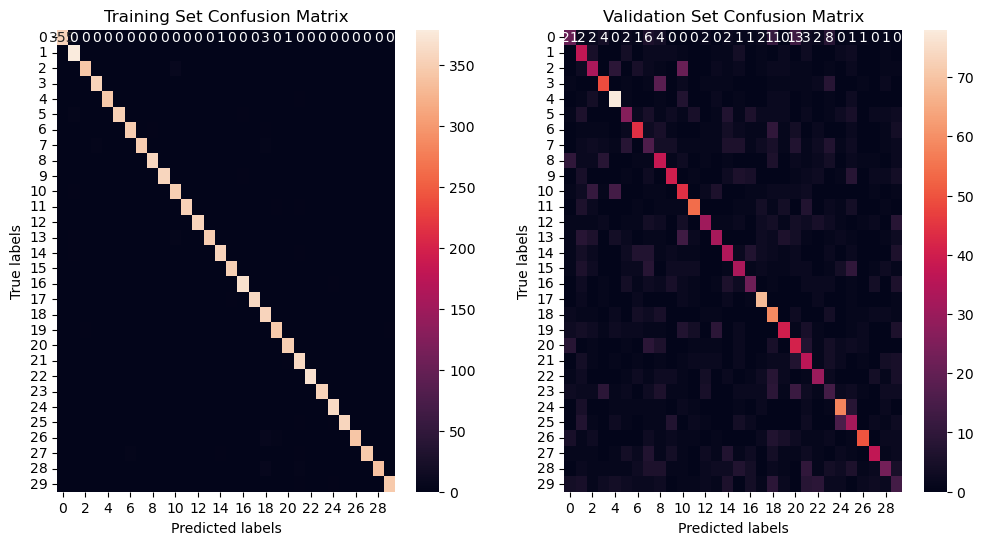

In [32]:
train_conf_mat = confusion_matrix(train_labels, train_preds)
val_conf_mat = confusion_matrix(val_labels, val_preds)

# Plotting the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(train_conf_mat, annot=True, ax=ax[0], fmt='g') 
ax[0].set_title('Training Set Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

sns.heatmap(val_conf_mat, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('Validation Set Confusion Matrix')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')

plt.show()

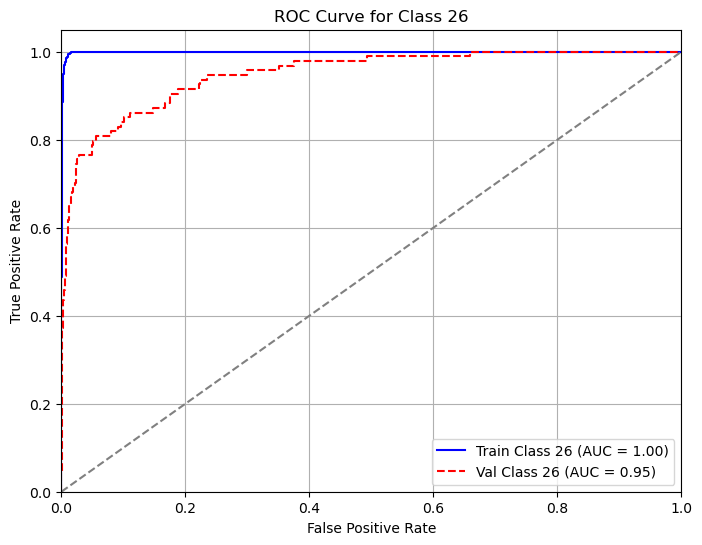

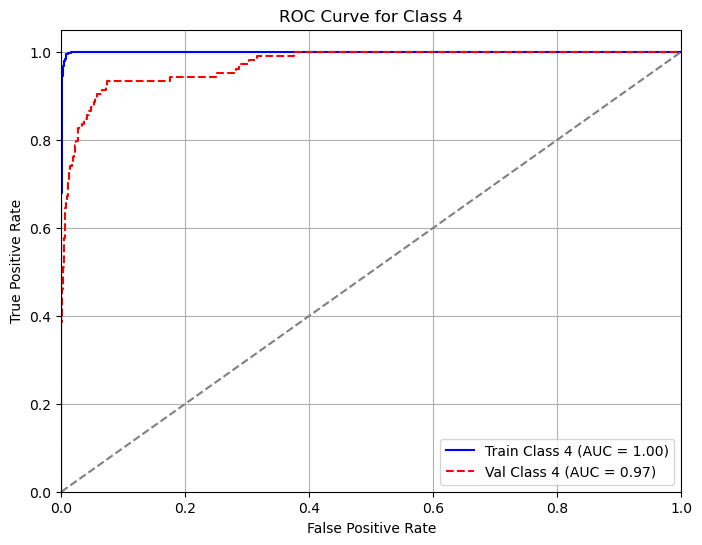

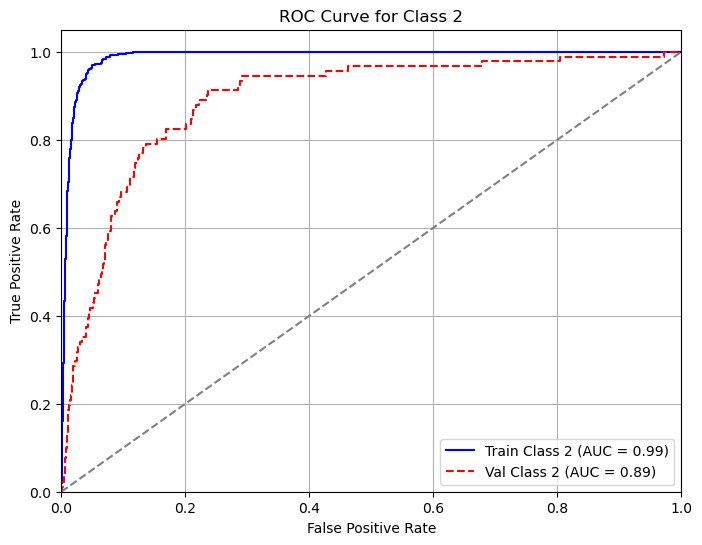

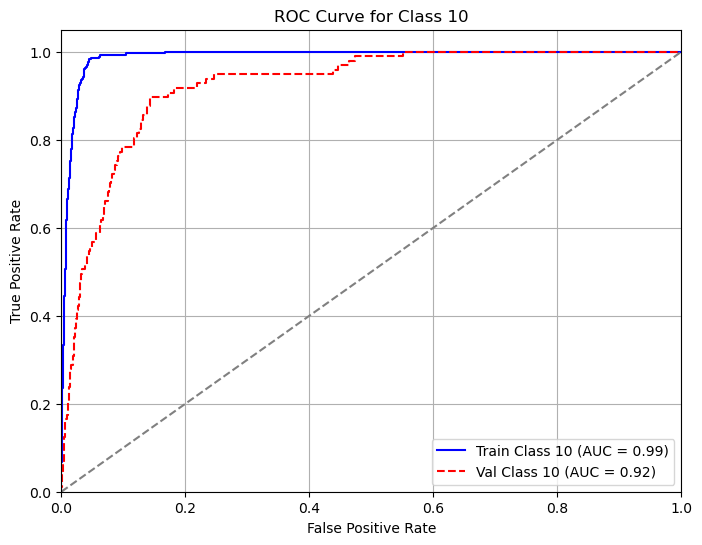

In [38]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def get_predictions(loader, model, device='cpu'):
    model = model.eval().to(device)
    all_probs = []
    prediction_labels = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device).float()
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_probs.append(outputs.cpu())
            prediction_labels.extend(preds.cpu())
            true_labels.extend(labels.cpu())


    all_probs = torch.vstack(all_probs).numpy()
    prediction_labels = np.array(prediction_labels)
    true_labels = np.array(true_labels)

    return all_probs, prediction_labels, true_labels

def compute_class_roc_auc(probs, labels_binarized, num_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(labels_binarized[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

def plot_class_roc_curve(class_id, train_fpr, train_tpr, train_roc_auc, val_fpr, val_tpr, val_roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(train_fpr[class_id], train_tpr[class_id], label=f'Train Class {class_id} (AUC = {train_roc_auc[class_id]:.2f})', color='blue', linestyle='-')
    plt.plot(val_fpr[class_id], val_tpr[class_id], label=f'Val Class {class_id} (AUC = {val_roc_auc[class_id]:.2f})', color='red', linestyle='--')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_id}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()



train_probs, train_preds, train_labels = get_predictions(train_loader, model, device)
val_probs, val_preds, val_labels = get_predictions(val_loader, model, device)

# Binarize the labels for ROC computation
num_classes = model.fc2.out_features 
train_labels_binarized = label_binarize(train_labels, classes=range(num_classes))
val_labels_binarized = label_binarize(val_labels, classes=range(num_classes))

# Compute ROC AUC for each class in both training and validation sets
train_fpr, train_tpr, train_roc_auc = compute_class_roc_auc(train_probs, train_labels_binarized, num_classes)
val_fpr, val_tpr, val_roc_auc = compute_class_roc_auc(val_probs, val_labels_binarized, num_classes)

# Find the top two and bottom two classes based on training set AUC
sorted_auc_indices = np.argsort([train_roc_auc[i] for i in range(num_classes)])
top_classes = sorted_auc_indices[-2:]  # Top two classes
bottom_classes = sorted_auc_indices[:2]  # Bottom two classes

# Plot ROC curves for the top and bottom classes
selected_classes = np.concatenate((top_classes, bottom_classes))
for class_id in selected_classes:
    plot_class_roc_curve(class_id, train_fpr, train_tpr, train_roc_auc, val_fpr, val_tpr, val_roc_auc)


### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish. 

In [ ]:
class SimpleCNN_Improved(nn.Module):
    def __init__(self, num_classes=30):
        super(SimpleCNN_Improved, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=128 * 8 * 8, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)  # Flatten the layer before feeding it into fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN_Improved()

In [ ]:

cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train CNN model
model, cnn_history = train_model(model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=15)

# Plot training history for CNN
plot_training_history(cnn_history)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


In [36]:
# Your code here!
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),  # Geometric: Horizontally flip the image with a 50% probability
    transforms.RandomVerticalFlip(p=0.5),    # Geometric: Vertically flip the image with a 50% probability
    transforms.RandomRotation(30),           # Geometric: Rotate the image up to 30 degrees
    transforms.RandomAffine(15),             # Geometric: Apply a random affine transformation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Color: Adjust brightness, contrast, saturation, and hue
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])  

In [37]:
new_full_dataset = TinyImage30Dataset(directory=train_dir, transform=data_transforms)
full_dataset_size = len(full_dataset)
test_size = int(0.2 * full_dataset_size)  # 20% for testing
train_size = full_dataset_size - test_size

# Split the dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Epoch 0/8 - Train Loss: 2.8338 - Train Acc: 0.1864 - Val Loss: 2.5358 - Val Acc: 0.2667
Epoch 1/8 - Train Loss: 2.2262 - Train Acc: 0.3569 - Val Loss: 2.2390 - Val Acc: 0.3544
Epoch 2/8 - Train Loss: 1.8493 - Train Acc: 0.4519 - Val Loss: 2.1058 - Val Acc: 0.4019
Epoch 3/8 - Train Loss: 1.4602 - Train Acc: 0.5621 - Val Loss: 2.2445 - Val Acc: 0.4059
Epoch 4/8 - Train Loss: 0.9990 - Train Acc: 0.6918 - Val Loss: 2.3583 - Val Acc: 0.4141
Epoch 5/8 - Train Loss: 0.5796 - Train Acc: 0.8196 - Val Loss: 2.9492 - Val Acc: 0.4048
Epoch 6/8 - Train Loss: 0.2992 - Train Acc: 0.9071 - Val Loss: 3.8187 - Val Acc: 0.3711
Epoch 7/8 - Train Loss: 0.2114 - Train Acc: 0.9349 - Val Loss: 4.1484 - Val Acc: 0.3848
Epoch 8/8 - Train Loss: 0.1561 - Train Acc: 0.9532 - Val Loss: 4.5645 - Val Acc: 0.3804


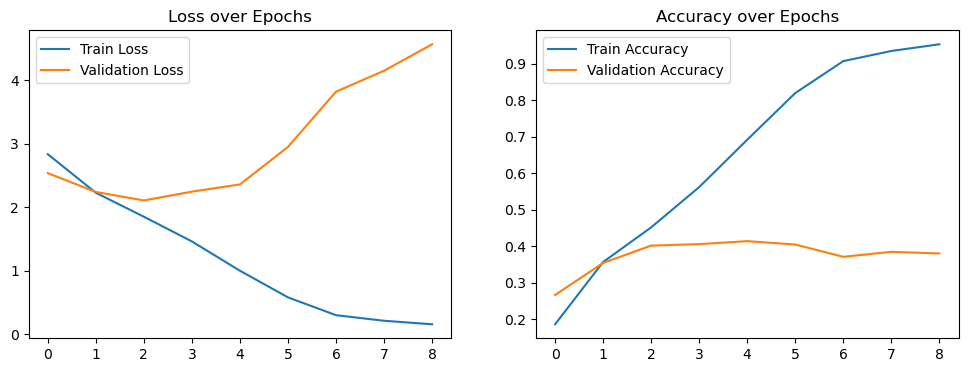

In [39]:
cnn_model = SimpleCNN_Improved()
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

# Train CNN model
cnn_model, cnn_history = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=9)

# Plot training history for CNN
plot_training_history(cnn_history)

#### Observations:
- The training loss decreases rapidly, which indicates that the model is learning effectively from the augmented data.
- The training accuracy increases steadily, reaching above 95%, which is a good sign that the model fits well with the training data.
- However, the validation loss does not decrease as hoped; instead, it increases slightly, suggesting the model needs to be generalised to unseen data.
- The validation accuracy is relatively low and remains flat, which may point to overfitting despite the augmentations.
- The discrepancy between training and validation metrics suggests the model needs to be generalised better. This could be due to several factors, such as model architecture, the complexity of the dataset, insufficient regularisation, or the fact that the augmentations need to be more diverse.


#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

In [40]:
class SimpleCNNWithDropout(nn.Module):
    def __init__(self, num_classes=30):
        super(SimpleCNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.dropout1 = nn.Dropout(0.25)  # Dropout layer after convolutional layers
        self.fc1 = nn.Linear(in_features=128 * 8 * 8, out_features=512)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer before the last fully connected layer
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)
        x = x.view(-1, 128 * 8 * 8)  # Flatten the layer before feeding it into fully connected layers
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x



Epoch 0/24 - Train Loss: 3.1297 - Train Acc: 0.1181 - Val Loss: 2.7180 - Val Acc: 0.2285
Epoch 1/24 - Train Loss: 2.6810 - Train Acc: 0.2289 - Val Loss: 2.5420 - Val Acc: 0.2819
Epoch 2/24 - Train Loss: 2.4710 - Train Acc: 0.2881 - Val Loss: 2.4367 - Val Acc: 0.3263
Epoch 3/24 - Train Loss: 2.3241 - Train Acc: 0.3277 - Val Loss: 2.3587 - Val Acc: 0.3456
Epoch 4/24 - Train Loss: 2.2193 - Train Acc: 0.3498 - Val Loss: 2.3165 - Val Acc: 0.3578
Epoch 5/24 - Train Loss: 2.1295 - Train Acc: 0.3769 - Val Loss: 2.2572 - Val Acc: 0.3841
Epoch 6/24 - Train Loss: 2.0383 - Train Acc: 0.4063 - Val Loss: 2.2690 - Val Acc: 0.3915
Epoch 7/24 - Train Loss: 1.9542 - Train Acc: 0.4286 - Val Loss: 2.2637 - Val Acc: 0.4000
Epoch 8/24 - Train Loss: 1.8777 - Train Acc: 0.4524 - Val Loss: 2.1868 - Val Acc: 0.4122
Epoch 9/24 - Train Loss: 1.8062 - Train Acc: 0.4663 - Val Loss: 2.1669 - Val Acc: 0.4252
Epoch 10/24 - Train Loss: 1.7266 - Train Acc: 0.4931 - Val Loss: 2.1714 - Val Acc: 0.4374
Epoch 11/24 - Train 

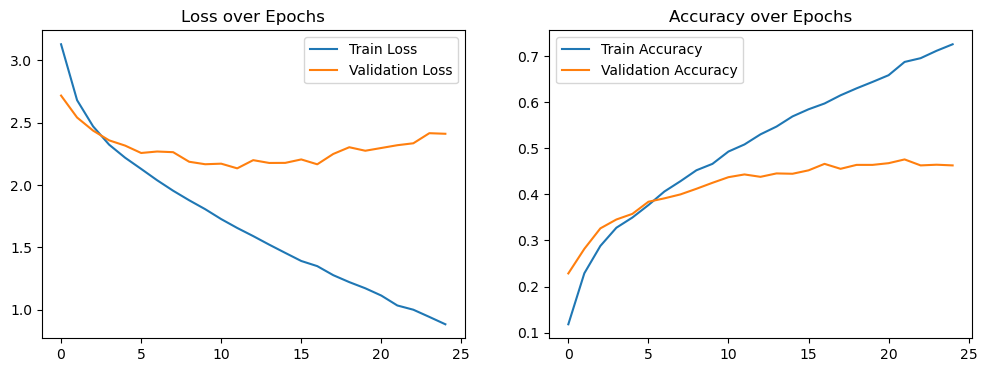

In [43]:
# Model instantiation
model = SimpleCNNWithDropout(num_classes=30)
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train CNN model
model, cnn_history = train_model(model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=25)

# Plot training history for CNN
plot_training_history(cnn_history)

#### Graph Analysis:
- Training Loss: There is a steady decline in training loss, which shows the model is learning and improving its ability to fit the training data over epochs.
- Validation Loss: The validation loss declines initially but starts to plateau and increase slightly towards the later epochs. This could suggest the beginning of overfitting or that the model has learned as much as it can from the training data given the current architecture and data.
- Training Accuracy: The training accuracy continuously increases, indicating consistent learning throughout the epochs.
- Validation Accuracy: The validation accuracy improves but plateaus around 46-47%. This suggests that while the model has learned patterns from the training data, its ability to generalize them to new data is limited.
#### Comments on Dropout Rates Used:
1. Convolutional layers typically have fewer parameters than fully connected layers, making them less likely to overfit. However, some dropouts are still beneficial to promoting feature robustness. Therefore, a 25% dropout rate is chosen after the convolutional layers.
2. The choice of 50% for dropout before the last fully connected layer is quite common in practice, especially for more extensive networks, to significantly reduce overfitting risks.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [48]:
cnn_model = SimpleCNNWithDropout()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.1)
# Train CNN model
cnn_model, cnn_history_01 = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=25)


Epoch 0/24 - Train Loss: 1848.7105 - Train Acc: 0.0337 - Val Loss: 3.4324 - Val Acc: 0.0341
Epoch 1/24 - Train Loss: 3.4565 - Train Acc: 0.0322 - Val Loss: 3.4218 - Val Acc: 0.0330
Epoch 2/24 - Train Loss: 3.4581 - Train Acc: 0.0362 - Val Loss: 3.4445 - Val Acc: 0.0348
Epoch 3/24 - Train Loss: 3.4713 - Train Acc: 0.0307 - Val Loss: 3.4350 - Val Acc: 0.0311
Epoch 4/24 - Train Loss: 3.4702 - Train Acc: 0.0373 - Val Loss: 3.4238 - Val Acc: 0.0289
Epoch 5/24 - Train Loss: 3.4738 - Train Acc: 0.0343 - Val Loss: 3.4184 - Val Acc: 0.0315
Epoch 6/24 - Train Loss: 3.4866 - Train Acc: 0.0311 - Val Loss: 3.4830 - Val Acc: 0.0348
Epoch 7/24 - Train Loss: 3.4941 - Train Acc: 0.0342 - Val Loss: 3.4506 - Val Acc: 0.0311
Epoch 8/24 - Train Loss: 3.4868 - Train Acc: 0.0356 - Val Loss: 3.4512 - Val Acc: 0.0304
Epoch 9/24 - Train Loss: 3.5054 - Train Acc: 0.0325 - Val Loss: 3.4545 - Val Acc: 0.0293
Epoch 10/24 - Train Loss: 3.4931 - Train Acc: 0.0336 - Val Loss: 3.4689 - Val Acc: 0.0337
Epoch 11/24 - Tra

In [49]:
cnn_model = SimpleCNNWithDropout()
# Your graph
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.01)
# Train CNN model
cnn_model, cnn_history_001 = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=25)

Epoch 0/24 - Train Loss: 3.4997 - Train Acc: 0.0331 - Val Loss: 3.4085 - Val Acc: 0.0337
Epoch 1/24 - Train Loss: 3.4059 - Train Acc: 0.0325 - Val Loss: 3.4077 - Val Acc: 0.0315
Epoch 2/24 - Train Loss: 3.4078 - Train Acc: 0.0320 - Val Loss: 3.4029 - Val Acc: 0.0348
Epoch 3/24 - Train Loss: 3.4069 - Train Acc: 0.0303 - Val Loss: 3.4080 - Val Acc: 0.0307
Epoch 4/24 - Train Loss: 3.4066 - Train Acc: 0.0299 - Val Loss: 3.4065 - Val Acc: 0.0289
Epoch 5/24 - Train Loss: 3.4062 - Train Acc: 0.0319 - Val Loss: 3.4053 - Val Acc: 0.0289
Epoch 6/24 - Train Loss: 3.4069 - Train Acc: 0.0315 - Val Loss: 3.4055 - Val Acc: 0.0289
Epoch 7/24 - Train Loss: 3.4062 - Train Acc: 0.0294 - Val Loss: 3.4047 - Val Acc: 0.0307
Epoch 8/24 - Train Loss: 3.4075 - Train Acc: 0.0321 - Val Loss: 3.4053 - Val Acc: 0.0289
Epoch 9/24 - Train Loss: 3.4068 - Train Acc: 0.0334 - Val Loss: 3.4043 - Val Acc: 0.0307
Epoch 10/24 - Train Loss: 3.4076 - Train Acc: 0.0319 - Val Loss: 3.4067 - Val Acc: 0.0307
Epoch 11/24 - Train 

In [50]:
cnn_model = SimpleCNNWithDropout()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.0001)
# Train CNN model
cnn_model, cnn_history_0001 = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=25)

Epoch 0/24 - Train Loss: 3.1343 - Train Acc: 0.1222 - Val Loss: 2.7691 - Val Acc: 0.2059
Epoch 1/24 - Train Loss: 2.7091 - Train Acc: 0.2233 - Val Loss: 2.5356 - Val Acc: 0.2804
Epoch 2/24 - Train Loss: 2.4989 - Train Acc: 0.2765 - Val Loss: 2.4855 - Val Acc: 0.3104
Epoch 3/24 - Train Loss: 2.3616 - Train Acc: 0.3140 - Val Loss: 2.4030 - Val Acc: 0.3270
Epoch 4/24 - Train Loss: 2.2428 - Train Acc: 0.3488 - Val Loss: 2.2973 - Val Acc: 0.3556
Epoch 5/24 - Train Loss: 2.1350 - Train Acc: 0.3831 - Val Loss: 2.2465 - Val Acc: 0.3785
Epoch 6/24 - Train Loss: 2.0420 - Train Acc: 0.4020 - Val Loss: 2.2486 - Val Acc: 0.3852
Epoch 7/24 - Train Loss: 1.9549 - Train Acc: 0.4302 - Val Loss: 2.2105 - Val Acc: 0.3933
Epoch 8/24 - Train Loss: 1.8816 - Train Acc: 0.4512 - Val Loss: 2.1862 - Val Acc: 0.4152
Epoch 9/24 - Train Loss: 1.7959 - Train Acc: 0.4756 - Val Loss: 2.1605 - Val Acc: 0.4193
Epoch 10/24 - Train Loss: 1.7205 - Train Acc: 0.4959 - Val Loss: 2.1412 - Val Acc: 0.4407
Epoch 11/24 - Train 

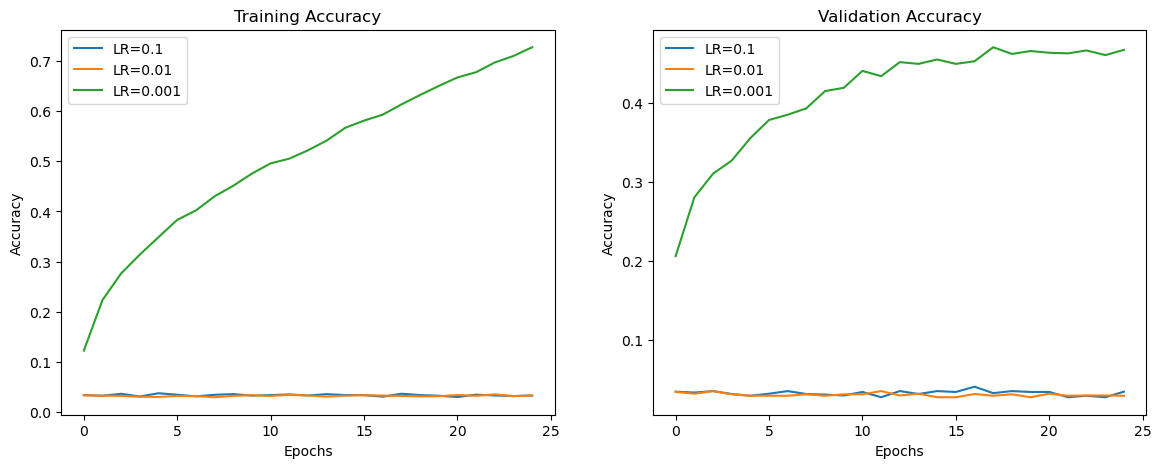

In [51]:
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history_01['train_acc'], label='LR=0.1')
plt.plot(cnn_history_001['train_acc'], label='LR=0.01')
plt.plot(cnn_history_0001['train_acc'], label='LR=0.001')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history_01['val_acc'], label='LR=0.1')
plt.plot(cnn_history_001['val_acc'], label='LR=0.01')
plt.plot(cnn_history_0001['val_acc'], label='LR=0.001')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [52]:
class TinyImage30TestDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        # Load only JPEG and PNG images and sort them to maintain order
        self.images = sorted(
            [img for img in os.listdir(directory) if img.endswith('.JPEG') or img.endswith('.png')]
        )

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Get the image path and load it
        img_name = self.images[idx]
        img_path = os.path.join(self.directory, img_name)
        image = Image.open(img_path).convert('RGB')
        
        # Apply the transformation
        if self.transform is not None:
            image = self.transform(image)
        
        # Return the image tensor and its corresponding filename
        return image, img_name

In [53]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [54]:
test_dataset = TinyImage30TestDataset(directory=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [ ]:
# Your code here! 
import pandas as pd
import torch

# Set the model to evaluation mode
model.eval()
test_ids = []
pred_categories = []

with torch.no_grad():
    for data in test_loader:
        images, ids = data
        images = images.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        test_ids.extend(ids)
        pred_categories.extend(predicted.cpu().numpy().tolist())

# Create a DataFrame with the results
submission_df = pd.DataFrame({
    'Id': test_ids,
    'Category': pred_categories
})

submission_file_name = 'mm23ap.csv'
submission_df.to_csv(submission_file_name, index=False)


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [56]:
# Your code here! 

cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

train_size = int(0.8 * len(cifar10_train))
val_size = len(cifar10_train) - train_size
train_dataset, val_dataset = random_split(cifar10_train, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

Files already downloaded and verified


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [65]:
# Your code here! 
alexnet = torchvision.models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, 10)
alexnet = alexnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.classifier.parameters(), lr=0.001)

#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

Trainable parameters in the model: 

features.0.weight torch.Size([64, 3, 11, 11])
features.0.bias torch.Size([64])
features.3.weight torch.Size([192, 64, 5, 5])
features.3.bias torch.Size([192])
features.6.weight torch.Size([384, 192, 3, 3])
features.6.bias torch.Size([384])
features.8.weight torch.Size([256, 384, 3, 3])
features.8.bias torch.Size([256])
features.10.weight torch.Size([256, 256, 3, 3])
features.10.bias torch.Size([256])
classifier.1.weight torch.Size([4096, 9216])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([10, 4096])
classifier.6.bias torch.Size([10])

Epoch 0/10 - Train Loss: 1.4292 - Train Acc: 0.5176 - Val Loss: 1.1246 - Val Acc: 0.6076
Epoch 1/10 - Train Loss: 1.2463 - Train Acc: 0.5739 - Val Loss: 1.0793 - Val Acc: 0.6240
Epoch 2/10 - Train Loss: 1.1725 - Train Acc: 0.5981 - Val Loss: 1.0868 - Val Acc: 0.6136
Epoch 3/10 - Train Loss: 1.1495 - Train Acc: 0.60

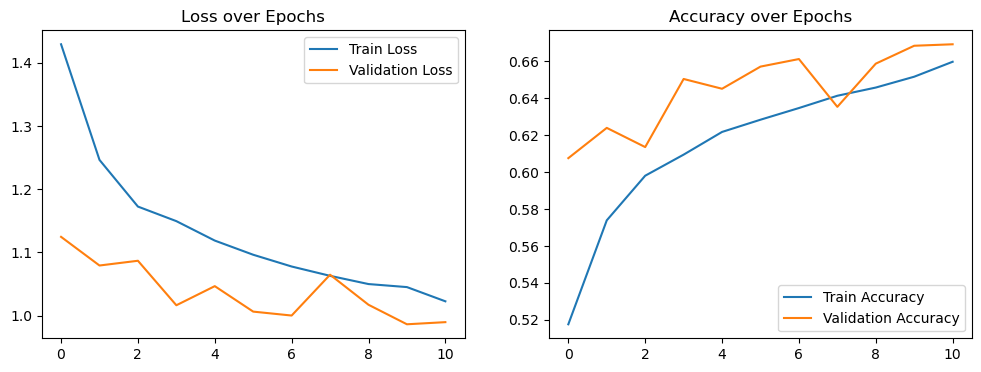

In [66]:
# Your model changes here - also print trainable parameters
print("Trainable parameters in the model: \n")
for name, param in alexnet.named_parameters():
    if param.requires_grad:
        print(name, param.data.shape)

print("======================== \n")

alexnet, alexnet_history = train_model(alexnet, train_loader, val_loader, criterion, optimizer, num_epochs=11)
plot_training_history(alexnet_history)

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [63]:
# Your changes here - also print trainable parameters

alexnet_frozen = torchvision.models.alexnet(pretrained=True)



for param in alexnet_frozen.features.parameters():
    param.requires_grad = False

print("Trainable parameters in the model: \n")
for name, param in alexnet_frozen.named_parameters():
    if param.requires_grad:
        print(name, param.data.shape)

print("======================== \n")

alexnet_frozen.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, 10)
alexnet_frozen = alexnet_frozen.to(device)

optimizer = optim.Adam(alexnet_frozen.classifier.parameters(), lr=0.001)



classifier.1.weight torch.Size([4096, 9216])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([1000, 4096])
classifier.6.bias torch.Size([1000])



Epoch 0/10 - Train Loss: 1.4120 - Train Acc: 0.5217 - Val Loss: 1.1114 - Val Acc: 0.6065
Epoch 1/10 - Train Loss: 1.2398 - Train Acc: 0.5773 - Val Loss: 1.1116 - Val Acc: 0.6191
Epoch 2/10 - Train Loss: 1.1833 - Train Acc: 0.5986 - Val Loss: 1.0244 - Val Acc: 0.6420
Epoch 3/10 - Train Loss: 1.1456 - Train Acc: 0.6108 - Val Loss: 1.0388 - Val Acc: 0.6447
Epoch 4/10 - Train Loss: 1.1160 - Train Acc: 0.6245 - Val Loss: 1.0322 - Val Acc: 0.6518
Epoch 5/10 - Train Loss: 1.1008 - Train Acc: 0.6324 - Val Loss: 1.0259 - Val Acc: 0.6561
Epoch 6/10 - Train Loss: 1.0798 - Train Acc: 0.6358 - Val Loss: 1.0239 - Val Acc: 0.6467
Epoch 7/10 - Train Loss: 1.0666 - Train Acc: 0.6426 - Val Loss: 1.0156 - Val Acc: 0.6619
Epoch 8/10 - Train Loss: 1.0532 - Train Acc: 0.6493 - Val Loss: 1.0106 - Val Acc: 0.6589
Epoch 9/10 - Train Loss: 1.0396 - Train Acc: 0.6548 - Val Loss: 0.9837 - Val Acc: 0.6722
Epoch 10/10 - Train Loss: 1.0256 - Train Acc: 0.6598 - Val Loss: 0.9881 - Val Acc: 0.6736


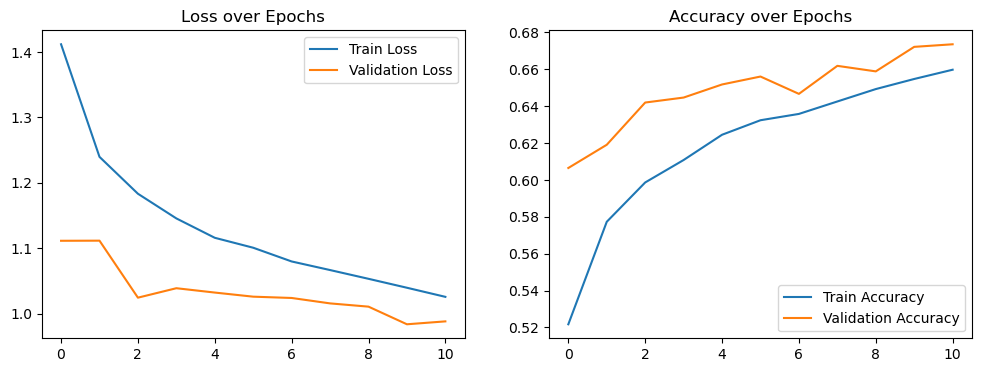

In [64]:
alexnet_frozen, alexnet_frozen_history = train_model(alexnet_frozen, train_loader, val_loader, criterion, optimizer, num_epochs=11)
plot_training_history(alexnet_frozen_history)

#### 4.3 Compare above configurations and comment on performances. (4 marks)

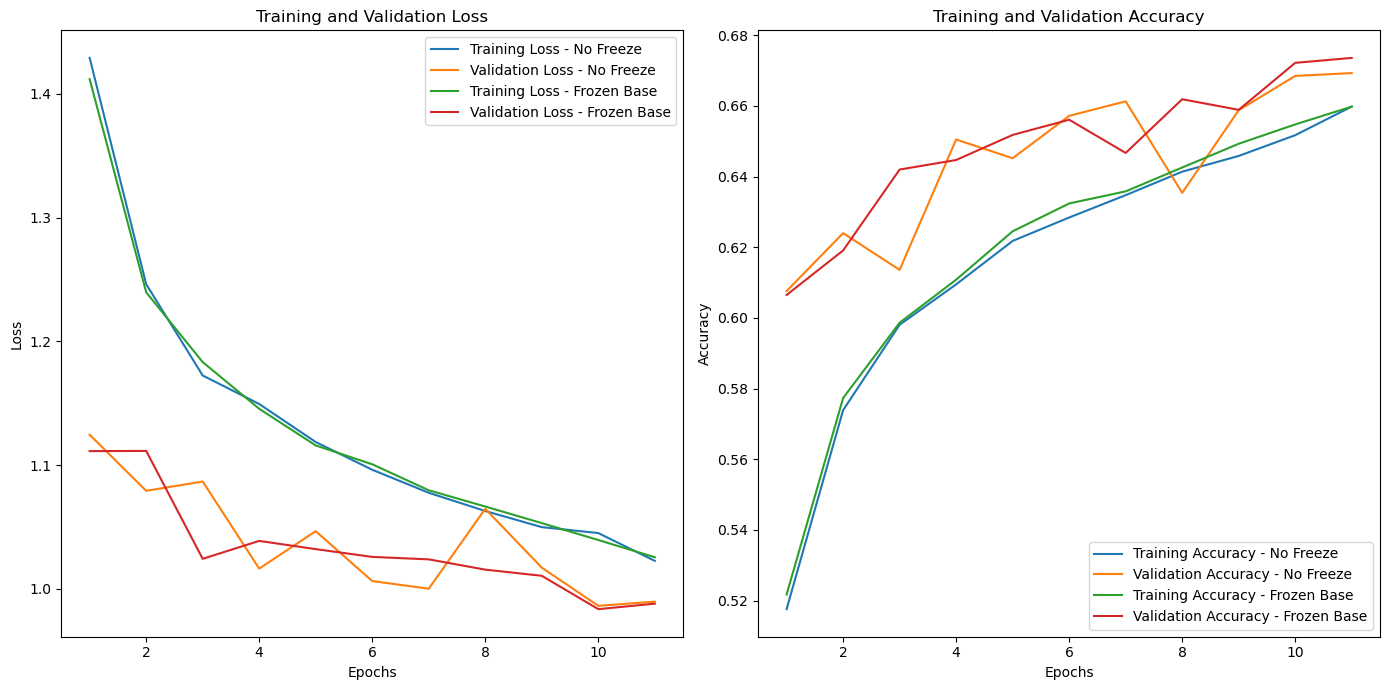

In [67]:
# Your graphs here and please provide comment in markdown in another cell

train_losses_no_freeze = alexnet_history['train_loss']
val_losses_no_freeze = alexnet_history['val_loss']
train_losses_frozen = alexnet_frozen_history['train_loss']
val_losses_frozen = alexnet_frozen_history['val_loss']
train_accuracies_no_freeze = alexnet_history['train_acc']
val_accuracies_no_freeze = alexnet_history['val_acc']
train_accuracies_frozen = alexnet_frozen_history['train_acc']
val_accuracies_frozen = alexnet_frozen_history['val_acc']
epochs = range(1, len(train_losses_no_freeze) + 1)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_no_freeze, label='Training Loss - No Freeze')
plt.plot(epochs, val_losses_no_freeze, label='Validation Loss - No Freeze')
plt.plot(epochs, train_losses_frozen, label='Training Loss - Frozen Base')
plt.plot(epochs, val_losses_frozen, label='Validation Loss - Frozen Base')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_no_freeze, label='Training Accuracy - No Freeze')
plt.plot(epochs, val_accuracies_no_freeze, label='Validation Accuracy - No Freeze')
plt.plot(epochs, train_accuracies_frozen, label='Training Accuracy - Frozen Base')
plt.plot(epochs, val_accuracies_frozen, label='Validation Accuracy - Frozen Base')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### From the loss graph, we can observe that:
- The model with the frozen base starts with a higher training loss, but the loss decreases more smoothly than without frozen layers.
- The validation loss for the frozen base model is consistently lower than that for the model without a freeze, which suggests that freezing the base is helping with generalization.
#### From the accuracy graph, it appears that:
- The model with the frozen base has a smoother increase in training accuracy and, after initial epochs, outperforms the model with no frozen layers regarding validation accuracy.
- The model with no freeze has a higher variance in validation accuracy, potentially indicating overfitting to the training data or instability in learning.
#### Conclusions:
- The model with the frozen base layers seems to generalize better on the validation set, indicated by a lower validation loss and higher validation accuracy.
- The smoother curves for the frozen base model suggest that it is learning more steadily and may be less prone to overfitting than the model with all layers trainable.
- The initial higher training loss for the frozen base model could be because the pre-trained features are not a perfect fit for the new dataset. However, as the fully connected layers adapt, the model quickly improves.

### Part II: Image Captioning using RNN [30 marks]



### Motivation 

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H). 

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here! 

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``). 

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects. 

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset. 

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment). 

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary 

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'mps')
print('Using device:', device)

Using device: mps


In [3]:
# Load the feature map provided to you
features_map = torch.load('data/resnet50_caption.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [4]:
import json
import pandas as pd

with open('data/COMP5625M_data_assessment_2/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [5]:
coco_subset = pd.read_csv("data/COMP5625M_data_assessment_2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [6]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [7]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [8]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [9]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [10]:
### build vocabulariy for each set - train, val and test 
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2340


In [11]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2510

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our 
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 


In [12]:
from helperDL import EncoderCNN  
model = EncoderCNN().to(device) 
print(model)

/Users/asishpanda/anaconda3/envs/dl/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/asishpanda/anaconda3/envs/dl/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [13]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [14]:
# say this is as below 
# --> Please change these numbers as required. 
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 1024 #increased hidden size to caputure more complex features
NUM_LAYERS = 2 #increased number of layers to capture more complex features
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [15]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        self.resize = nn.Linear(2048, embed_size) # Assuming features are 2048 in size
        
        
        # batch normalisation helps to speed up training
        # your code
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

        # your code for embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)

        # your code for RNN
        self.rnn = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, dropout=0.5)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)
        
        # compute your feature embeddings
        # your code
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)
    
        # pack_padded_sequence returns a PackedSequence object, which contains two items: 
        # the packed data (data cut off at its true length and flattened into one list), and 
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data 
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
        hiddens, _ = self.rnn(packed)
    


        outputs = self.linear(hiddens[0]) #hint: use a hidden layers in parenthesis
        return outputs
    
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [16]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [17]:

# loss and optimizer here
# your code here --->
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

# Optimizer (using Adam here, which is a common choice)
optimizer = optim.Adam(decoder.parameters(), lr=LR)



# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0
for epoch in range(NUM_EPOCHS):
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        # your code here --->
        features_ = features_.to(device)
        captions_ = captions_.to(device)

        optimizer.zero_grad()

        outputs = decoder(features_, captions_, lengths_)

        targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
        loss = criterion(outputs, targets) 

        loss.backward()
        optimizer.step()
  
        total_loss += loss.item()

        # print stats
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")
    
    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    decoder.eval()
    with torch.no_grad():  
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            # your code here --->
            features_ = features_.to(device)
            captions_ = captions_.to(device)

            outputs = decoder(features_, captions_, lengths_)

            targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
            loss = criterion(outputs, targets)

            total_loss += loss.item()


            
    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0
    # print stats
    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()

(5, 2)
Epoch [1/5], Step [0/555], Loss: 7.8323
Epoch [1/5], Step [10/555], Loss: 5.7775
Epoch [1/5], Step [20/555], Loss: 5.5456
Epoch [1/5], Step [30/555], Loss: 5.1402
Epoch [1/5], Step [40/555], Loss: 4.8426
Epoch [1/5], Step [50/555], Loss: 4.5375
Epoch [1/5], Step [60/555], Loss: 4.5391
Epoch [1/5], Step [70/555], Loss: 4.1860
Epoch [1/5], Step [80/555], Loss: 4.4630
Epoch [1/5], Step [90/555], Loss: 4.5641
Epoch [1/5], Step [100/555], Loss: 4.3990
Epoch [1/5], Step [110/555], Loss: 4.2333
Epoch [1/5], Step [120/555], Loss: 4.1109
Epoch [1/5], Step [130/555], Loss: 3.8535
Epoch [1/5], Step [140/555], Loss: 4.2680
Epoch [1/5], Step [150/555], Loss: 4.0497
Epoch [1/5], Step [160/555], Loss: 3.8190
Epoch [1/5], Step [170/555], Loss: 4.2665
Epoch [1/5], Step [180/555], Loss: 4.0981
Epoch [1/5], Step [190/555], Loss: 3.9418
Epoch [1/5], Step [200/555], Loss: 3.8745
Epoch [1/5], Step [210/555], Loss: 4.0666
Epoch [1/5], Step [220/555], Loss: 3.8321
Epoch [1/5], Step [230/555], Loss: 3.9

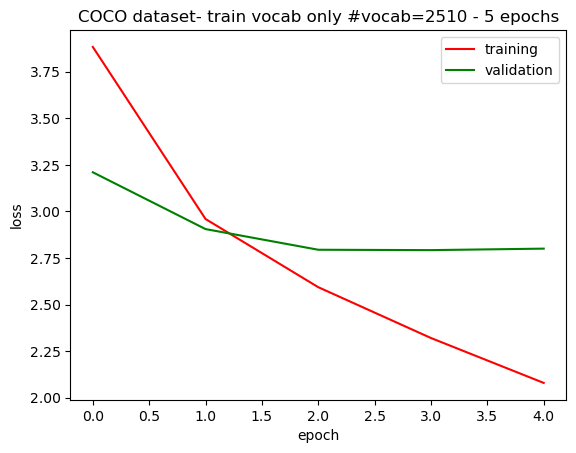

In [18]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

In [19]:
# save model after training
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks] 

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [20]:
from PIL import Image


class COCOImagesDataset(Dataset):
    def __init__(self, df, transform=None):
        """
        Args:
            df (DataFrame): DataFrame containing image paths and captions.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.df = df
        self.transform = transform
        self.pth = 'data/COMP5625M_data_assessment_2/coco/images'

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx, 3]  
        caption = self.df.iloc[idx, 4]   

        img_path = os.path.join(self.pth, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, caption

In [21]:
data_transform = transforms.Compose([ 
    transforms.Resize(224),     
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [22]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2510, 256)
  (rnn): LSTM(256, 1024, num_layers=2, batch_first=True, dropout=0.5)
  (linear): Linear(in_features=1024, out_features=2510, bias=True)
)

In [24]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

GENERATED: a man riding a motorcycle on top of a

REFERENCE:some people in the woods riding two elephants

REFERENCE:several elephants in the jungle carrying people on their backs

REFERENCE:some people who are riding on top of elephants

REFERENCE:they are brave for riding in the jungle on those elephants




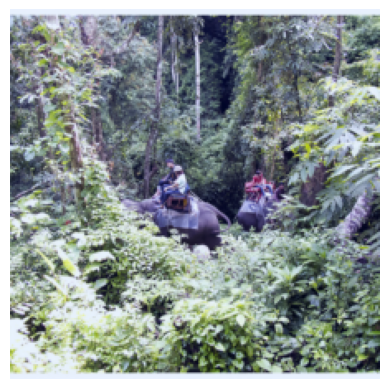


REFERENCE:a small pizza that is on a white plate

REFERENCE:a small personal sized pizza is shown on display

REFERENCE:the pizza is loaded with lots of toppings

REFERENCE:the woman is standing with her luggage




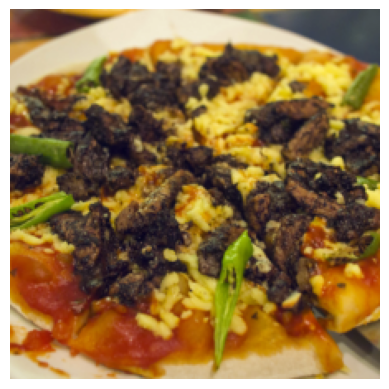


GENERATED: a person is holding a banana and a beverage

REFERENCE:a pair of gray scissors hanging on a nail and another black item

REFERENCE:a brown and black dog is laying on a roof

REFERENCE:a large dog sitting on top of a roof

REFERENCE:a dog is on the roof of a building




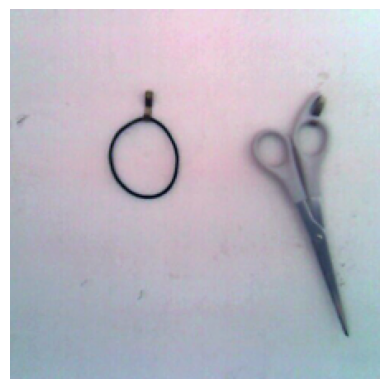


GENERATED: a group of people flying kites in a field

REFERENCE:a crowd of people standing around a dry grass covered field

REFERENCE:groups of people in a field sitting down standing and walking with tent areas in the background

REFERENCE:people gather in the grass beneath cloudy skies for some sort of a patriotic event

REFERENCE:a crowd of people on a beach watching kites fly




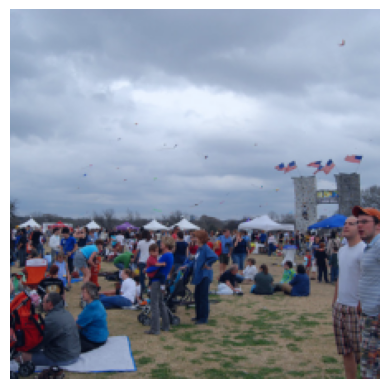


GENERATED: a baseball player sliding at a base ball game

REFERENCE:an umpire is catching a baseball that was missed by the batter

REFERENCE:a baseball player holding a baseball bat during a game

REFERENCE:several people ride surfboards in the ocean waves

REFERENCE:three surfers can be seen trying to catch a wave




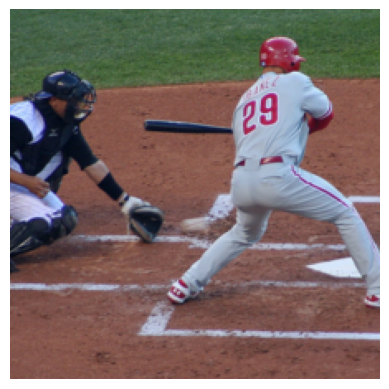


GENERATED: a motorcycle parked in a parking lot next to a fire hydrant water

REFERENCE:a custom made motorcycle with a trailer and two seats

REFERENCE:a motorcycle parked in a parking space next to a red car

REFERENCE:a motorcycle with attached seats outside a building

REFERENCE:a large customized motorcycle sitting in a parking space




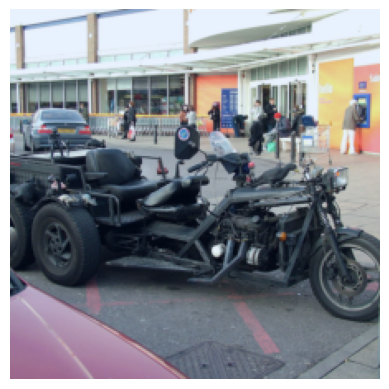


GENERATED: a man in a tennis match is swinging his racket at a tennis ball

REFERENCE:two men standing next to each other holding tennis racquets

REFERENCE:two men pose for a picture while holding rackets

REFERENCE:two men on a tennis court with tennis rackets

REFERENCE:modern workspace with dual monitors microphones and other electronic equipment




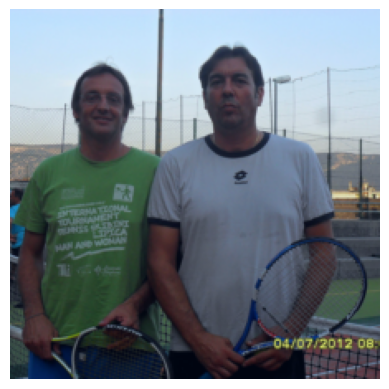


GENERATED: a fire hydrant is sitting on the side of a street

REFERENCE:a redwhieandblue fire hydrant is on the street in front of houses

REFERENCE:a platter of grilled vegetables on a table with a woman seated

REFERENCE:a plate on a table topped with lots of vegetables

REFERENCE:a long tray filled with a lot of fruits and veggies on it




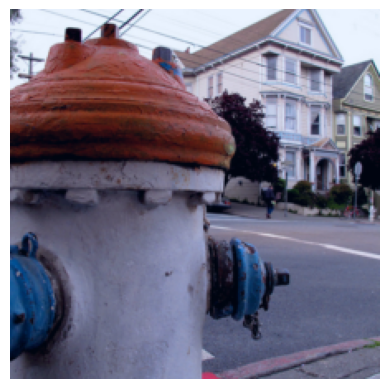


GENERATED: a yellow and white bus on a city street

REFERENCE:a passenger bus travels down a road straddling the center line

REFERENCE:a bus driving down a street with people seated on the roof of the bus

REFERENCE:a bus is traveling down the road with many passengers

REFERENCE:a bus with people riding on the roof




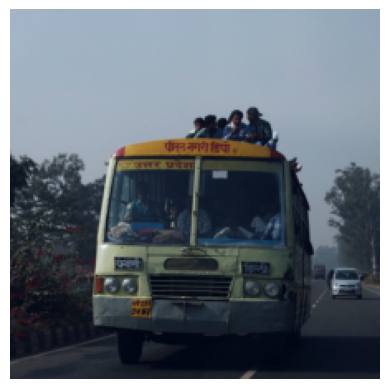


GENERATED: a suitcase sitting on the ground next to a wooden bench on a sidewalk

REFERENCE:a stack of luggage by a curb and parked car

REFERENCE:a large amount of luggage sitting near a car

REFERENCE:a piece of bread holding various foods that include sauce and a salad

REFERENCE:some vegetables beans and sauce and other food




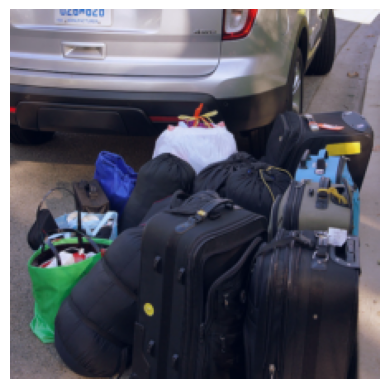

In [25]:
IMAGES_TO_SHOW = 10
idx = 0
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):
        
        # your code here --->
        image = image.to(device)

        features = model(image).to(device)
        sampled_ids = decoder.sample(features)
        sampled_ids = sampled_ids.cpu().numpy()
        
        idy = 0
        for i in range(sampled_ids.shape[0]):
            predicted_ids = sampled_ids[i]
    
            predicted_ids_trimmed = predicted_ids[(predicted_ids != vocab('<start>')) & (predicted_ids != vocab('<end>')) & (predicted_ids != vocab('<pad>'))]
    # Decode the caption
            generated_caption = decode_caption(predicted_ids_trimmed, vocab)
            idy += 1
            if idx == 1:
                break
    
    # Display the generated caption
            print(f"GENERATED: {generated_caption}\n")
            break

        #print(f"REFERENCES: {filename[0]}\n")
        for k in range(4):
            print(f"REFERENCE:{filename[k]}\n")
        

        print("===================================\n")


        timshow(image[0].cpu())
        print("===================================\n")
        idx +=1
        if idx == IMAGES_TO_SHOW:
            break

#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions: 

* Find the embedding vector of each word in the caption 
* Compute the average vector for each caption 
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores 

Calculate the cosine similarity using the model's predictions over the whole test set. 

Display a histogram of the distribution of scores over the test set.

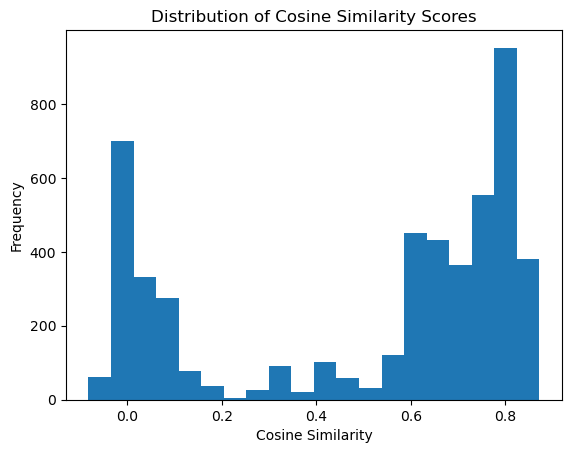

In [26]:
# your code here
from torch.nn.functional import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as sklearn_cosine_similarity

word_embeddings = decoder.embed.weight.data.cpu().numpy()

def get_caption_embedding(caption, vocab, word_embeddings):
    # Convert caption to list of indices
    indices = [vocab.word2idx[word] for word in caption.split() if word in vocab.word2idx]
    # Retrieve the corresponding embeddings and take the mean
    if len(indices) == 0:
        return np.zeros(word_embeddings.shape[1])
    caption_embedding = np.mean(word_embeddings[indices], axis=0)
    return caption_embedding

cosine_scores = []

# Loop through the test dataset
for images, true_captions in test_loader.dataset:

    if images.ndim == 3:
        images = images.unsqueeze(0)  # Add batch dimension at the beginning

    images = images.to(device)

    # Generate captions for the images
    features = model(images)
    sampled_ids = decoder.sample(features)
    sampled_ids = sampled_ids.cpu().numpy()


    # Decode the generated captions
    generated_captions = [decode_caption(sample, vocab) for sample in sampled_ids]
    generated_embeddings = np.array([get_caption_embedding(cap, vocab, word_embeddings) for cap in generated_captions])

    # Get embeddings for the true captions
    true_embeddings = np.array([get_caption_embedding(cap, vocab, word_embeddings) for cap in true_captions])

    # Compute the cosine similarity
    for gen_emb, true_emb in zip(generated_embeddings, true_embeddings):
        similarity = sklearn_cosine_similarity([gen_emb], [true_emb])
        cosine_scores.append(similarity.item())

# Display a histogram of the distribution of cosine similarity scores
plt.hist(cosine_scores, bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarity Scores')
plt.show()


##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.